# Set up

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
#Load data
data = pd.read_csv("Documents/1 Thesis Files/stats_with_mpg.csv", index_col = 0)

In [31]:
#Check Structure
print(data.head())  # Display the first few rows
print(data.info())  # Summary of column data types and missing values
print(data.describe())  # Summary statistics of numerical columns

   Number                Name  Team Position   PPG   RPG  APG  SPG  BPG  TOPG  \
0      10     Ildefonso, Dave  ADMU        G  12.0   8.3  2.7  1.0  0.1   2.8   
1      34        Kouame, Ange  ADMU        C  11.6  11.3  1.7  0.5  2.5   1.4   
2      15  Padrigao, Forthsky  ADMU        G  11.3   4.3  5.5  2.3  0.0   2.4   
3       1      Ballungay, Kai  ADMU        F  11.1   5.6  1.0  0.9  0.1   1.4   
4       2      Andrade, Bryan  ADMU        G   9.5   2.7  2.1  0.9  0.2   1.5   

   FPG  FDPG   +/-  EFFPG     FG%    3PT%     FT%    MPG  
0  1.7   2.3   7.7   13.5  30.90%  25.90%  62.00%  27.44  
1  2.4   3.9   8.7   24.7  54.80%  43.80%  52.70%  27.30  
2  1.0   2.2  10.5   14.4  31.20%  24.30%  87.90%  26.41  
3  1.7   1.5   7.6   15.0  56.40%  44.70%  74.30%  22.01  
4  1.5   1.8   9.9   10.3  36.20%  34.70%  92.60%  25.50  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    

# Some Visualizations

**Player Performance: PPG, APG, RPG, SPG, BPG**

Boxplot: This visualization shows the distribution of each statistic (PPG, APG, RPG, SPG, BPG). We can observe the central tendency, spread, and potential outliers for each statistic. For instance, if PPG has a higher median than other stats, it indicates better scoring performance.

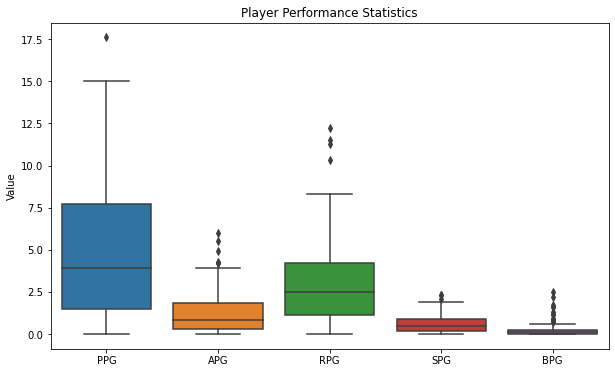

In [20]:
# Player Performance: PPG, APG, RPG, SPG, BPG
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['PPG', 'APG', 'RPG', 'SPG', 'BPG']])
plt.title('Player Performance Statistics')
plt.ylabel('Value')
plt.show()

**Average Points Scored by Each Team**

Barplot: This visualization compares the average points scored (PPG) by each team. We can quickly identify which teams have higher scoring averages. Teams with higher bars have better offensive performance.

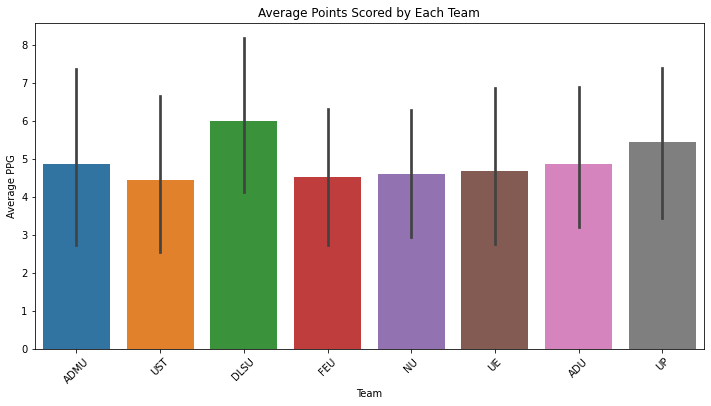

In [32]:
# Average Points Scored by Each Team
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='PPG', data=data)
plt.title('Average Points Scored by Each Team')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Average PPG')
plt.show()

**Player Comparisons: PPG vs APG**

Scatterplot: Scatterplots help you see the relationship between two variables (PPG and APG in this case). You can identify whether players who score more points tend to have more assists, revealing potential correlations between scoring and playmaking.

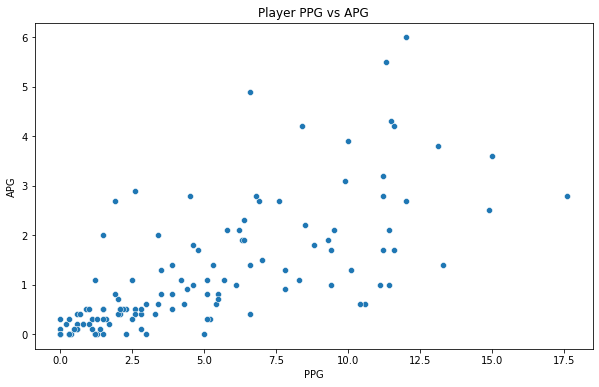

In [33]:
# Player Comparisons: PPG vs APG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PPG', y='APG', data=data)
plt.title('Player PPG vs APG')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

**Correlation Heatmap**

Heatmap: The correlation heatmap provides insights into how different statistics correlate with each other. Positive values indicate a positive correlation, while negative values suggest a negative correlation. Closer to 1 or -1 means a stronger correlation. You can identify which stats have stronger relationships.

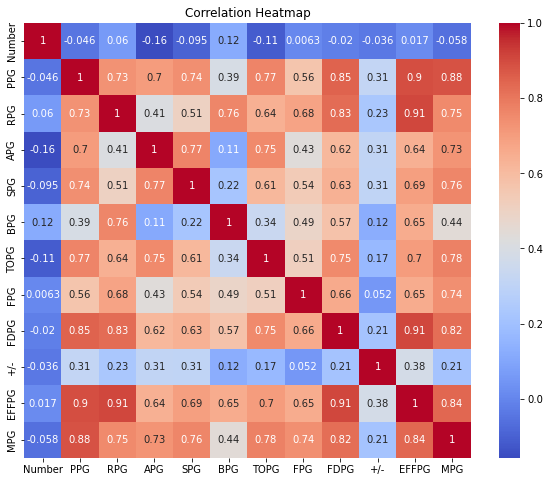

In [40]:
# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Clustering Basics**

The following code snippet demonstrates an approach to identifying and analyzing potential player roles in a basketball dataset using exploratory data analysis (EDA) techniques. Leveraging Python libraries such as pandas, seaborn, and scikit-learn, this code delves into the statistical attributes of players and utilizes clustering algorithms to categorize them into distinct clusters based on performance metrics like points per game (PPG), assists per game (APG), rebounds per game (RPG), steals per game (SPG), and blocks per game (BPG). Through the application of K-means clustering, players are grouped into clusters that exhibit similar statistical profiles. The subsequent role analysis identifies the dominant attributes within each cluster, suggesting player roles such as scorers, playmakers, and defenders. The code concludes by visualizing the distribution of these inferred player roles, contributing valuable insights into basketball strategies and team dynamics.

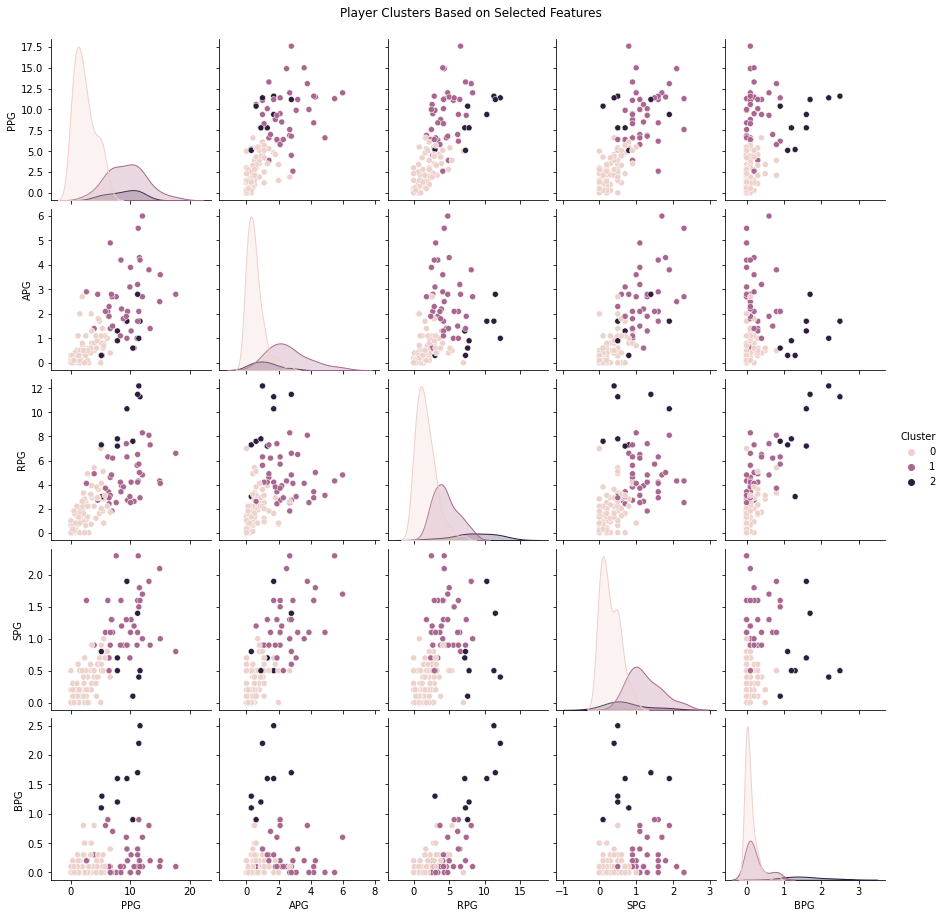

              PPG       APG       RPG       SPG       BPG
Cluster                                                  
0        2.317722  0.529114  1.715190  0.294937  0.101266
1        9.323077  2.600000  4.489744  1.228205  0.238462
2        8.877778  1.177778  8.688889  0.755556  1.566667


In [45]:
# Select relevant columns for clustering
selected_features = ['PPG', 'APG', 'RPG', 'SPG', 'BPG']

# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_features])

# Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters using pair plots
sns.pairplot(data=data, hue='Cluster', vars=selected_features)
plt.suptitle('Player Clusters Based on Selected Features', y=1.02)
plt.show()

# Analyze role characteristics within each cluster
cluster_stats = data.groupby('Cluster')[selected_features].mean()
print(cluster_stats)